In [1]:
import sys
import os
#sys.path.insert(0, "/usr/src/app/app")
def import_path(fullpath):
    """ 
    Import a file with full path specification. Allows one to
    import from anywhere, something __import__ does not do. 
    """
    path, filename = os.path.split(fullpath)
    filename, ext = os.path.splitext(filename)
    sys.path.append(path)
    module = __import__(filename)
   # reload(module) # Might be out of date
    del sys.path[-1]
    return module
import_path("/usr/src/app/app")

<module 'app' from '/usr/src/app/app/__init__.py'>

In [2]:
from PIL import Image

from app.pkg.ml.autotags.autotag import AutoTagger
from app.pkg.ml.buffer_converters import BytesConverter

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
at = AutoTagger()

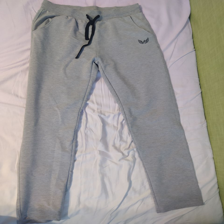

In [13]:
fp = "/usr/src/app/data/example/trousers.png"
tags = {"cloth_subcategory":["blose", "jacket", "t-shirt", "pants", "military jacket", "trousers"],
        "season":["winter", "summer", "autumn", "spring"],
        "category":["shoes", "lower body", "upper body", "dress"]
        }
image = Image.open(fp)
inp_data = {"image":at.bytes_converter.image_to_bytes(image), "tags":tags}

image.resize((224,224))

In [14]:
probs_dict = at.forward(input_data=inp_data)

In [15]:
probs_dict
# for group_tag, text_block_tags in probs_dict.items():
#     res_string = ''
#     for tag in text_block_tags:
#         prob = probs_dict[tag]
#         r_prob = round(prob,3)
#         res_string += f'{tag}:{r_prob}, '
#     print(res_string)

{'cloth_subcategory': {'blose': 0.0,
  'jacket': 0.001,
  't-shirt': 0.014,
  'pants': 0.589,
  'military jacket': 0.0,
  'trousers': 0.396},
 'season': {'winter': 0.362,
  'summer': 0.556,
  'autumn': 0.003,
  'spring': 0.078},
 'category': {'shoes': 0.224,
  'lower body': 0.605,
  'upper body': 0.121,
  'dress': 0.05}}

In [ ]:
probs_dict

{'blose': 0.0,
 'jacket': 0.001,
 't-shirt': 0.014,
 'pants': 0.589,
 'military jacket': 0.0,
 'trousers': 0.396,
 'winter': 0.362,
 'summer': 0.556,
 'autumn': 0.003,
 'spring': 0.078}